ЗАДАНИЕ 1

Одной из основных задач аналитика в нашей команде является корректное проведение экспериментов. Для этого мы применяем метод A/B–тестирования. В ходе тестирования одной гипотезы целевой группе была предложена новая механика оплаты услуг на сайте, у контрольной группы оставалась базовая механика. В качестве задания Вам необходимо проанализировать итоги эксперимента и сделать вывод, стоит ли запускать новую механику оплаты на всех пользователей.

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px
from scipy.stats import mannwhitneyu, chi2_contingency
import seaborn as sns
import pandahouse as ph

In [2]:
# файл с информацией о принадлежности пользователя 
# к контрольной или экспериментальной группе (А – контроль, B – целевая группа)

groups = pd.read_csv('Проект_2_groups.csv', sep=';')
groups.head()

,id,grp
0,1489,B
1,1627,A
2,1768,B
3,1783,B
4,1794,A


In [3]:
# дополнительный файл с пользователями, который вам 
# прислали спустя 2 дня после передачи данных

group_add = pd.read_csv('Проект_2_group_add.csv')
group_add.head()

,id,grp
0,5694584,B
1,5694830,B
2,5695057,B
3,5698872,B
4,5699067,B


In [4]:
# файл с информацией о пользователях, которые 
# зашли на платформу в дни проведения эксперимента. 

active_studs = pd.read_csv('Проект_2_active_studs.csv')
active_studs.head()

,student_id
0,581585
1,5723133
2,3276743
3,4238589
4,4475369


In [5]:
# файл с информацией об оплатах пользователей в дни
# проведения эксперимента. 
checks = pd.read_csv('Проект_2_checks.csv', sep=';')
checks.head()

,student_id,rev
0,1627,990.0
1,3185,690.0
2,25973,690.0
3,26280,690.0
4,100300,990.0


На какие метрики Вы смотрите в ходе анализа и почему?

Имеются ли различия в показателях и с чем они могут быть связаны?

Являются ли эти различия статистически значимыми?

Стоит ли запускать новую механику на всех пользователей?
_____________________________________

ЦЕЛЬ: стоит ли запускать новую механику оплаты на всех пользователей
(целевая группа - новая механика оплаты услуг, контрольная - базовая механика)

МЕТРИКИ: конверсия, средний чек

In [6]:
# объединяю данные groups и active_studs в новую таблицу our_groups
# фильтрую данные пользователей, которые зашли на платформу в дни проведения эксперимента.

active_studs = active_studs.rename(columns={'student_id': 'id'})
our_groups = groups.merge(active_studs, how = 'right', on = 'id')
our_groups = our_groups.dropna(subset=['grp'])
our_groups.head()

,id,grp
0,581585,A
2,3276743,B
3,4238589,A
4,4475369,B
5,5481015,B


In [7]:
# также добавляю файл с информацией об оплатах пользователей к общей таблице

checks = checks.rename(columns = {'student_id' : 'id'})
df = our_groups.merge(checks, how = 'outer', on = 'id')
df = df.dropna(subset=['grp'])
df.head()

,id,grp,rev
0,581585,A,NaN
1,3276743,B,NaN
2,4238589,A,NaN
3,4475369,B,NaN
4,5481015,B,NaN


In [8]:
# смотрю только на тех пользователей, которые активные в момент проведения эксперимента 
# (для подсчета среднего чека в каждой группе),учитвываю только тех пользователей,
# которые произвели оплату в этот период (убираю тех кто не делал оплату)

df_payment = df.dropna(subset=['rev'])
df_payment.head()

,id,grp,rev
61,1184303,A,1530.0000
66,3354191,B,1900.0001
76,3278734,B,1900.0000
98,720651,A,1980.0000
191,1232221,B,1900.0000


In [9]:
# считаю средний чек для группы  А

ARPPU_A = df_payment.query('grp =="A"').rev.sum() / \
    df_payment.query('grp =="A"').rev.count()
ARPPU_A

933.5897435897435

In [10]:
# считаю средний чек для группы  B

ARPPU_B = df_payment.query('grp =="B"').rev.sum() / \
    df_payment.query('grp =="B"').rev.count()
ARPPU_B

1255.8274872204472

In [11]:
# средний чек по группам различается на 25.6 %

In [12]:
# считаю конверсию по группам

In [13]:
A = df_payment.query('grp =="A"').rev
B = df_payment.query('grp =="B"').rev

In [14]:
# конверсия для группы  А

CR_A = A.count() / df.query('grp =="A"').grp.count() *100
CR_A

5.081433224755701

In [15]:
# конверсия для группы  В

CR_B = B.count() / df.query('grp =="B"').grp.count() *100
CR_B

4.607684380980421

In [16]:
# конверсия в группах отличается на примерно пол процента

In [17]:
# необходимо понять стат.значимо ли различие конверсии и средний чек

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


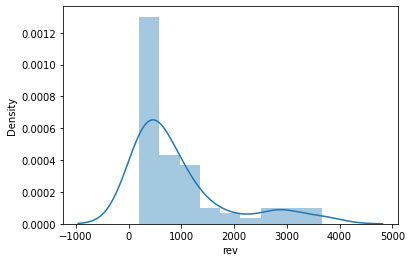

In [18]:
# распределение оплат пользователей по группам экспериментов:

sns_plot_A = sns.distplot(A)
fig_A = sns_plot_A.get_figure()

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


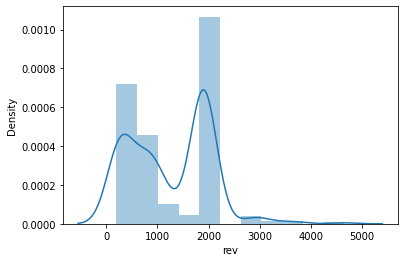

In [19]:
sns_plot_B = sns.distplot(B)
fig_B = sns_plot_B.get_figure()

In [20]:
# Сравнивая распределения по группам, видно, что распределение rev группы В отличается пиком в
# районе rev=2000.Этот резкий скачок оплаты в целевой группе можно расценить как успешное 
# внедрение фичи (т.к.средний чек стал больше). Возможно, это связано с временными условиями 
# (например, начало учебных купсов и все нужно оплатить учебу, может это предпраздничные дни 
# и всем надо что-то купить), поэтому виден резкий скачок в распределении.

# Необходимо понять стат.значима ли разница CR между группами,также посмотрим на ARPPU

In [21]:
# Так как распределения не соответствуют нормальным,
# Проверяю гипотезы с помощью хи2

# Мои гипотезы (для CR):

# 𝐻0 : конверсия группы А и конверсия группы В на самом деле статистически не отличаются 
# и что наблюдаемые различия (на примерно пол процента) случайны

# 𝐻1 : конверсия группы B статистически отличается от конверсии группы A и взаимосвязь
# между изменением конверсии и добавлением фичи есть

In [22]:
# для вычисления конверсии использую изначальный датафрейм с информацией о тех,кто не делал оплату
df['payment'] = df['rev'].apply(lambda x: 'buy' if x > 0 else 'not_buy')
df[['grp', 'payment']]
# количественные показатели тестов
pd.crosstab(df.payment, df.grp)

grp,A,B
payment,,
buy,78,313
not_buy,1457,6480


In [23]:
# смотрю на статистику конверсии с помощью критерия хи2
stat, p, dof, expected = chi2_contingency(pd.crosstab(df.payment, df.grp))
stat, p

(0.526607176998989, 0.46803677583199144)

In [24]:
# проверка гипотез
prob = 0.95
alpha = 1.0 - prob
if p <= alpha:
    print('Отклоняем H0')
else:
    print('Не отклоняем H0')

Не отклоняем H0


In [25]:
# После применения хи2 подтвердилась гипотеза о том, что конверсии группы А и В статистически 
# не отличаются и что наблюдаемые различия (на примерно пол процента) случайны. 

In [26]:
# Теперь проверим показатели среднего чека при помощи u-теста:

# Мои гипотезы (для ARPPU):

# 𝐻0 : средний чек группы А и средний чек группы В на самом деле статистически не отличаются 
# и что наблюдаемые различия (на 25.6 %) случайны

# 𝐻1 : средний чек группы B статистически отличается от среднего чека группы A и взаимосвязь
# между изменением среднего чека и добавлением фичи есть

In [27]:
results = mannwhitneyu(A, B)
prob = 0.95
alpha = 1.0 - prob

print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отклоняем Н0")
else:
    print("Не отклоняем Н0")

p-значение: 0.000273244700505943
Отклоняем Н0


In [28]:
# В то же время по показателям ARPPU подтвердилась гипотеза о том, что средний чек группы B 
# статистически отличается от группы A и взаимосвязь между изменением среднего чека и 
# добавлением фичи есть

In [29]:
# Вывод: По результатам эксперимента видно, что средний чек увеличился на 25.6 %, а конверися 
#     на примерно полпроцента. Статистический анализ показал, что изменение среднего чека 
#     статистически значимо, а конверсия нет. По скольку часто цель компаний - увеличение 
#     объема продаж и увеличение прибыли, изменение механики оплат запускать стоит, так как
#     увеличится средний чек

In [30]:
# ========================================================================

ЗАДАНИЕ 2.1

Образовательные курсы состоят из различных уроков, каждый из которых состоит из нескольких маленьких заданий. Каждое такое маленькое задание называется "горошиной".

Назовём очень усердным учеником того пользователя, который хотя бы раз за текущий месяц правильно решил 20 горошин.


Необходимо написать оптимальный запрос, который даст информацию о количестве очень усердных студентов.

In [31]:
connection_default = {'host': 'http://clickhouse.beslan.pro:8080',
                      'database':'default',
                      'user':'student', 
                      'password':'dpo_python_2020'
                     }

In [32]:
query1 = """
    SELECT
    st_id,
    count(st_id) AS count_id
FROM default.peas
WHERE correct = 1
GROUP BY st_id
HAVING count_id >= 20
ORDER BY count_id DESC  
LIMIT 200
"""

In [33]:
df1 = ph.read_clickhouse(query = query1, connection = connection_default)
len(df1)

136

In [34]:
# даны данные со временным периодом в несколько дней, поэтому не фильтрую данные по дате

In [35]:
# =======================================================================

ЗАДАНИЕ 2.2

Образовательная платформа предлагает пройти студентам курсы по модели trial: студент может решить бесплатно лишь 30 горошин в день. Для неограниченного количества заданий в определенной дисциплине студенту необходимо приобрести полный доступ. Команда провела эксперимент, где был протестирован новый экран оплаты.

Необходимо в одном запросе выгрузить следующую информацию о группах пользователей:

ARPU,
ARPAU,
CR в покупку, 
СR активного пользователя в покупку,
CR пользователя из активности по математике (subject = ’math’) в покупку курса по математике,
ARPU считается относительно всех пользователей, попавших в группы.

In [38]:
query2 = '''  
    select
 q1.test_grp as test_grp, 
 q1.arpu as arpu, q2.arpau as arpau, q1.cr as cr, q2.cr_act as cr_act, q3.cr_math as cr_math
    from 
    (select 
    avg(money) as arpu,
    count(st_id) filter (where money >0) / count(money) as cr
    ,
    test_grp
    from (select
        st_id,
        sum(money) as money
        from default.final_project_check 
        group by st_id) as total_payments
    full outer join default.studs on total_payments.st_id = studs.st_id
    GROUP BY test_grp
    ) as q1
join    
(select 
avg(money) as arpau,
count(st_id) filter (where money !=0) / count(money) as cr_act
,
test_grp
from
(select *
from studs 
join
(SELECT
st_id,
sum(correct) as correct
from peas
group by st_id
having correct >10) as peas_agr
on studs.st_id = peas_agr.st_id) as act_st
left join
(SELECT
st_id,
sum(money) as money
from default.final_project_check
GROUP BY st_id) as sum_money
on act_st.st_id = sum_money.st_id
group by test_grp
)as q2 on q1.test_grp = q2.test_grp
join
    (select
    count(st_id) filter (where money !=0) / count(money) as cr_math
    ,
    test_grp
    from
    (
    select *
    from studs 
    join
    (SELECT
    st_id,
    sum(correct) as correct,
    subject
    from peas
    where subject = 'Math'
    group by st_id, subject
    having correct >=2) as peas_agr
    on studs.st_id = peas_agr.st_id) as act_st
    left join
    (SELECT
    st_id,
    sum(money) as money
    from default.final_project_check
    GROUP BY st_id) as sum_money
    on act_st.st_id = sum_money.st_id 
    group by test_grp
    ) as q3 on q2.test_grp = q3.test_grp
    '''

In [39]:
df2 = ph.read_clickhouse(query = query2, connection = connection_default)
df2

,test_grp,arpu,arpau,cr,cr_act,cr_math
0,control,4540.983607,10393.700787,0.049180,0.110236,0.102041
1,pilot,11508.474576,29739.583333,0.108475,0.260417,0.142857


In [40]:
# =======================================================================

ЗАДАНИЕ 3

Реализуйте функцию, которая будет автоматически подгружать информацию из дополнительного файла groups_add.csv (заголовки могут отличаться) и на основании дополнительных параметров пересчитывать метрики.
Реализуйте функцию, которая будет строить графики по получаемым метрикам.

In [41]:
# исходный датафрейм
df_payment.head()

,id,grp,rev
61,1184303,A,1530.0000
66,3354191,B,1900.0001
76,3278734,B,1900.0000
98,720651,A,1980.0000
191,1232221,B,1900.0000


In [42]:
# дополнительный файл
new_part = 'Проект_2_group_add.csv'

In [43]:
def auto_loading(new_part): # автоматическое одновление данных
    new_df = pd.read_csv(new_part)
    final_df = df_payment.merge(new_df, how='outer', on = ['id', 'grp'])
    
    # считаю средний чек для группы  А c обновленными данными
    ARPPU_A_updated = final_df.query('grp =="A"').rev.sum() / \
    final_df.query('grp =="A"').rev.count()

    # считаю средний чек для группы  B c обновленными данными
    ARPPU_B_updated = final_df.query('grp =="B"').rev.sum() / \
    final_df.query('grp =="B"').rev.count()
    
    # конверсия для группы  А c обновленными данными
    CR_A_updated = final_df.query('grp =="A"').rev.count() / \
        final_df.query('grp =="A"').grp.count() *100

    # конверсия для группы  В c обновленными данными
    CR_B_updated = final_df.query('grp =="B"').rev.count() / \
        final_df.query('grp =="B"').grp.count() *100

    return {'ARPPU':[ARPPU_A_updated, ARPPU_B_updated], 'CR': [CR_A_updated, CR_B_updated]}

In [44]:
# исходные метрики
metrics_old = {'ARPPU':[ARPPU_A, ARPPU_B], 'CR':[CR_A, CR_B]}
metrics_old = pd.DataFrame(metrics_old)
metrics_old['variant'] = ['A_old', 'B_old']
metrics_old

,ARPPU,CR,variant
0,933.589744,5.081433,A_old
1,1255.827487,4.607684,B_old


In [45]:
# создаю функцию, которая будет дабавлять в таблицу к исходным метрикам обновленные 
# данные и построит наглядный график изменения значений

In [46]:
def auto_building(new_part): # автоматическое построение графиков
    
    metrics_updated = auto_loading(new_part)
    metrics_updated = pd.DataFrame(metrics_updated)
    metrics_updated['variant'] = ['A_updated', 'B_updated']
    
    # объединяю в один датафрейм исходные и обновленные данные
    all_metrics = metrics_old.merge(metrics_updated, how = 'outer', on = ['variant', 'ARPPU', 'CR']) \
        .sort_values(by='variant')
    
    fig, axs = plt.subplots(nrows=2)
    sns.barplot(x='variant', y='CR', data=all_metrics, ax=axs[0])
    sns.barplot(x = 'variant', y = 'ARPPU', data = all_metrics, ax=axs[1])
    return(all_metrics)


,ARPPU,CR,variant
0,933.589744,5.081433,A_old
2,933.589744,78.000000,A_updated
1,1255.827487,4.607684,B_old
3,1255.827487,81.723238,B_updated


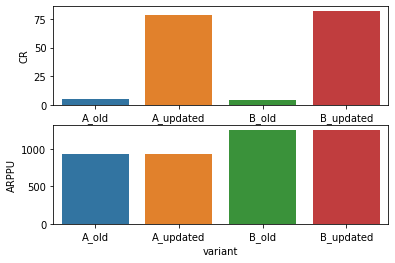

In [47]:
auto_building(new_part)

In [48]:
# вывод: при добавлении данных в таблицу видно, что конверсия сильно изменилась, 
#     а средний чек остался неизменным. Это связано с недостаточным объемом данных, 
#     которые предоставлены в качестве дополнительного файла ('Проект_2_group_add.csv')